In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS


In [48]:
import numpy as np
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import xgboost as xgb

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm

In [93]:
import pandas as pd
import nltk
import sklearn

from nltk.collocations import *
from nltk.corpus import stopwords
# from nltk.stem import *
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
wordnet_lemmatizer = WordNetLemmatizer()
english = set(nltk.corpus.words.words())

In [2]:
df = pd.read_csv('youtubecleaned.csv')

In [3]:
df2 = pd.read_csv('mathvideosdf.csv')

In [4]:
df2.columns

Index(['Unnamed: 0', 'tags', 'channelId', 'channelTitle', 'categoryId',
       'title', 'videoId', 'viewCount', 'likeCount', 'dislikeCount',
       'commentCount', 'favoriteCount', 'description'],
      dtype='object')

In [5]:
df.columns

Index(['Unnamed: 0', 'category_id', 'channel_title', 'comment_count',
       'description', 'likes', 'dislikes', 'tags', 'title', 'trending_date',
       'video_id', 'views'],
      dtype='object')

In [6]:
df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

In [10]:
df.shape

(41635, 13)

## Check NAs

In [8]:
df.isna().sum()

Unnamed: 0         0
category_id      394
channel_title    394
comment_count    394
description      967
likes            486
dislikes         486
tags             490
title            578
trending_date    578
video_id         578
views            774
category_name    543
dtype: int64

In [9]:
df.dropna(how = 'all')

,Unnamed: 0,category_id,channel_title,comment_count,description,likes,dislikes,tags,title,trending_date,video_id,views,category_name
0,0,22.0,CaseyNeistat,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,57527,2966,SHANtell martin,WE WANT TO TALK ABOUT OUR MARRIAGE,17.14.11,2kyS6SvSYSE,748374.0,People and Blogs
1,1,24.0,LastWeekTonight,12703,"One year after the presidential election, John...",97185,6146,"last week tonight trump presidency|""last week ...",The Trump Presidency: Last Week Tonight with J...,17.14.11,1ZAPwfrtAFY,2418783.0,Entertainment
2,2,23.0,Rudy Mancuso,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,146033,5339,"racist superman|""rudy""|""mancuso""|""king""|""bach""...","Racist Superman | Rudy Mancuso, King Bach & Le...",17.14.11,5qpjK5DgCt4,3191434.0,Comedy
3,3,24.0,Good Mythical Morning,2146,Today we find out if Link is a Nickelback amat...,10172,666,"rhett and link|""gmm""|""good mythical morning""|""...",Nickelback Lyrics: Real or Fake?,17.14.11,puqaWrEC7tY,343168.0,Entertainment
4,4,24.0,nigahiga,17518,I know it's been a while since we did this sho...,132235,1989,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I Dare You: GOING BALD!?,17.14.11,d380meD0W0M,2095731.0,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41630,195,15.0,Brave Wilderness,3245,"On this episode of Blue Wilderness, Mark and t...",47246,1495,sharks|shark|great white shark|brave wildernes...,Entering Kill Zone with Great White Sharks!,19.08.12,bdep2hOWDc8,NaN,Pets and Animals
41631,196,28.0,Unbox Therapy,10632,Smartphone cases don't have to ruin your phone...,60835,29285,latercase|later case|phone case|thin phone cas...,Don't Ruin Your Smartphone,19.08.12,s0wKAHQI8XU,NaN,Science and Technology
41632,197,24.0,A&E,2403,Stay up to date on all of A&E's latest premier...,14699,649,a&e|aetv|a&e tv|ae|a&e television|a&e shows|a ...,"Live PD: Best of Lake County, Illinois Sheriff...",19.08.12,ZLuxpDxhHYA,NaN,Entertainment
41633,198,10.0,FabolousVEVO,3075,Summertime Shootout 3 is out now! Download & s...,42486,1012,Fabolous|B.O.M.B.S.|Def|Jam|Recordings|Hip|Hop,Fabolous - B.O.M.B.S.,19.08.12,yr_qQmvE4bU,NaN,Music


## Data Cleaning = Dealing with NAs

In [20]:
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df = df.dropna(subset=['views'])
df['views']= df['views'].astype(int)


In [24]:
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df = df.dropna(subset=['views'])
df['likes']= df['likes'].astype(int)

In [25]:
df['dislikes'] = pd.to_numeric(df['dislikes'], errors='coerce')
df = df.dropna(subset=['dislikes'])
df['dislikes']= df['dislikes'].astype(int)

In [26]:
df['comment_count'] = pd.to_numeric(df['comment_count'], errors='coerce')
df = df.dropna(subset=['comment_count'])
df['comment_count']= df['comment_count'].astype(int)

## tranform likes comments count into log

In [30]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)


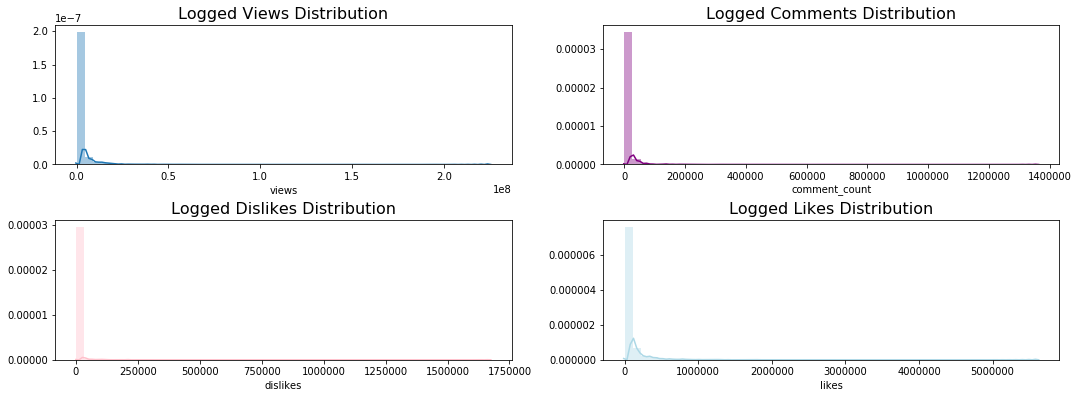

In [192]:
plt.figure(figsize = (18,6))

plt.subplot(221)
g1 = sns.distplot(df['views'])
g1.set_title("Views Distribution", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df['likes'],color='lightblue')
g2.set_title('Likes Distribution', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df['dislikes'], color='pink')
g3.set_title("Dislikes Distribution", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df['comment_count'], color='purple')
g4.set_title("Comments Distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

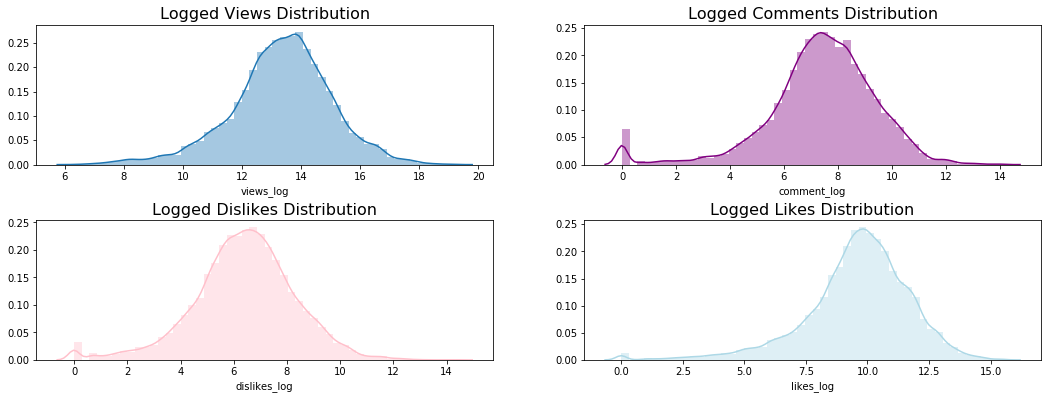

In [191]:
plt.figure(figsize = (18,6))

plt.subplot(221)
g1 = sns.distplot(df['views_log'])
g1.set_title("Logged Views Distribution", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df['likes_log'],color='lightblue')
g2.set_title('Logged Likes Distribution', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df['dislikes_log'], color='pink')
g3.set_title("Logged Dislikes Distribution", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df['comment_log'], color='purple')
g4.set_title("Logged Comments Distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

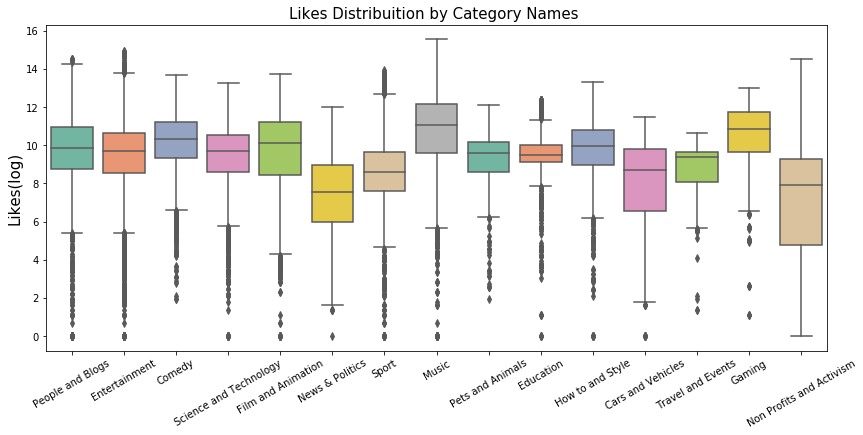

In [198]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=df, palette="Set2")
g.set_xticklabels(g.get_xticklabels(),rotation=30)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Likes(log)", fontsize=15)
plt.show()


In [199]:
df.shape


(40861, 17)

In [200]:
#Word count in each comment:
df['title_wordcnt']=df["title"].apply(lambda x: len(str(x).split()))
df['tag_word_count']=df["tags"].apply(lambda x: len(str(x).split()))

#Unique word count
df['title_uniquewordcnt']=df["title"].apply(lambda x: len(set(str(x).split())))
df['tag_uniquewordcnt']=df["tags"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['title_lettercnt']=df["title"].apply(lambda x: len(str(x)))
df['tag_lettercnt']=df["tags"].apply(lambda x: len(str(x)))

#Average length of the words
df["title_avg_lenword"] = df["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df["tag_avg_lenword"] = df["tags"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [201]:
df.to_csv('youtubedatafinal.csv')

# Text Processing of the titles

In [134]:
def preprocess_text(text):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL', text)
    text = re.sub('@[^\s]+','USER', text)
    text = text.lower().replace("ё", "е")
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +',' ', text)
    return text.strip()
clean_sentences = [preprocess_text(t) for t in df['title']]


In [150]:
clean_sentences[0].split()

['we', 'want', 'to', 'talk', 'about', 'our', 'marriage']

In [153]:
cleaned_sentences = []
for words in clean_sentences:
    word = words.split()
    allowed_words = []
    for w in word:
        if w in stop_words:
            continue
        allowed_words.append(w)
    cleaned_sentences.append(' '.join(allowed_words))
    

In [155]:
vec = CountVectorizer()
X = vec.fit_transform(cleaned_sentences)
dffeatures = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [157]:
tfidf = TfidfVectorizer()

In [159]:
response = tfidf.fit_transform(cleaned_sentences)

In [160]:
tfidf_df = pd.DataFrame(response.toarray(), columns=tfidf.get_feature_names())

In [161]:
tfidf_df.head()

,11,111,11foot8,12,1211,1214,122,1224,125,126p,...,одразу,олигархи,охотница,разоблачает,разошлись,сhat,села,сход,укра,яхты
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
unique_words = list(dffeatures.columns.values)

In [163]:
word_sums = [(word, dffeatures[word].sum()) for word in unique_words]

In [164]:
from operator import itemgetter
word_sums.sort(key=itemgetter(1), reverse=True)

In [203]:
word_sums[1]

('video', 2864)

In [166]:
relevant = []
for word in unique_words:
    if tfidf_df[word].mean() > 0.001:
        relevant.append(tfidf_df[word])
len(relevant)

364

In [167]:
relevant_df = pd.DataFrame(relevant).transpose()
relevant_df.head()

,11,13,14,15,16,17,18,24,4k,acoustic,...,white,wild,wired,without,world,wrong,year,years,young,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## get rid of the numbers and youtube

In [186]:
relevant_df = relevant_df.iloc[:,9:363]

In [187]:
relevant_df.to_csv('tokens.csv')# tokens as the features